In [1]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from tqdm import tqdm

print("Imported successfully")

Imported successfully


In [2]:
# Fonction de chargement du dataset
def load_dataset(dataset_path):
    dataset = pd.read_csv(dataset_path, sep=";")
    return dataset

# Appel de la fonction
dataset_path = "C:/Users/vikne/Documents/Master 2/Semestre 9/Intelligence artificielle/Travel-Order-Resolver/ai/nlp/dataset/text/text_intention_detector.csv"
dataset = load_dataset(dataset_path)

print("Loaded dataset successfully")

Loaded dataset successfully


In [3]:
# Fonction pour obtenir les mappings de labels avec tqdm
def get_label_mappings(dataset):
    labels = [label for label in tqdm(dataset.columns, desc="Extraction des labels") if label != 'sentence']
    id2label = {i: label for i, label in enumerate(labels)}
    label2id = {v: k for k, v in id2label.items()}
    return labels, id2label, label2id

# Appel de la fonction
labels, id2label, label2id = get_label_mappings(dataset)

Extraction des labels: 100%|██████████| 4/4 [00:00<?, ?it/s]


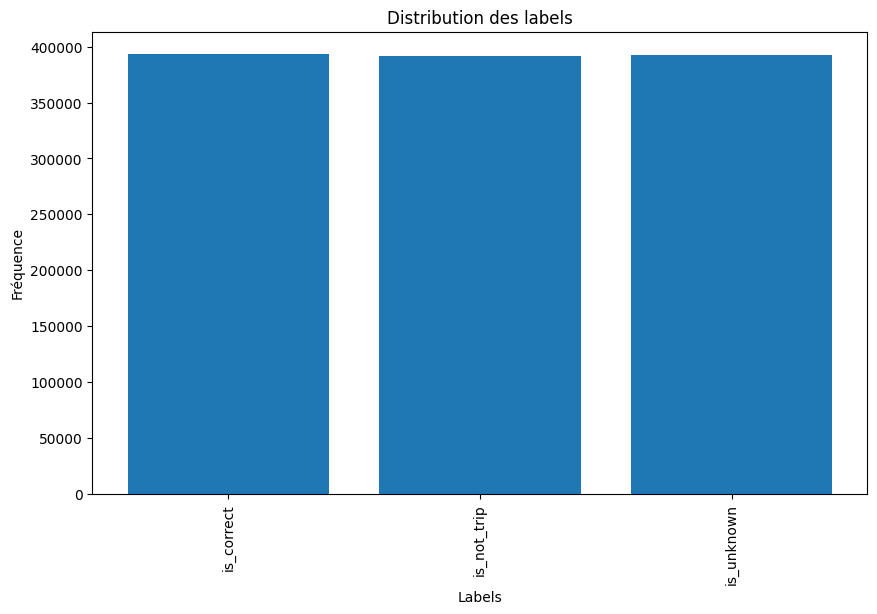

In [4]:
# Fonction de visualisation de la distribution des labels
def plot_label_distribution(labels, dataset):
    plt.figure(figsize=(10, 6))
    plt.bar(labels, [sum(dataset[label]) for label in labels])
    plt.title("Distribution des labels")
    plt.xlabel("Labels")
    plt.ylabel("Fréquence")
    plt.xticks(rotation=90)
    plt.show()

# Appel de la fonction
plot_label_distribution(labels, dataset)

In [5]:
# Fonction de séparation des données en train, validation et test avec tqdm
def split_data(dataset, labels, frac=0.5, test_size=0.2, random_state=42):
    tqdm_desc = "Séparation des données"
    with tqdm(total=4, desc=tqdm_desc) as pbar:  # 4 étapes dans ce processus
        X = dataset['sentence']
        y = dataset[labels]
        pbar.update(1)  # Étape 1 : Extraction des colonnes

        X = X.sample(frac=frac, random_state=random_state)
        y = y.loc[X.index]
        pbar.update(1)  # Étape 2 : Échantillonnage aléatoire

        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=random_state)
        pbar.update(1)  # Étape 3 : Première séparation train / temp

        X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=random_state)
        pbar.update(1)  # Étape 4 : Deuxième séparation temp / validation et test
    
    return X_train, X_val, X_test, y_train, y_val, y_test

# Appel de la fonction
X_train, X_val, X_test, y_train, y_val, y_test = split_data(dataset, labels)

Séparation des données: 100%|██████████| 4/4 [00:01<00:00,  3.51it/s]


In [6]:
# Fonction pour créer et entraîner le modèle avec bigrammes
def train_model(X_train, y_train):
    steps = ['Initialisation du pipeline', 'Vectorisation des données', 'Entraînement du modèle']
    pipeline = None

    with tqdm(total=len(steps), desc="Entraînement du modèle") as pbar:
        # Étape 1 : Initialisation du pipeline
        pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer(ngram_range=(1, 2), min_df=100)),  # Utilisation de TF-IDF avec bigrammes
            ('classifier', OneVsRestClassifier(MultinomialNB()))
        ])
        pbar.update(1)  # Met à jour la barre après la première étape

        # Étape 2 : Vectorisation
        pipeline.named_steps['vectorizer'].fit(X_train)
        pbar.update(1)  # Met à jour la barre après la deuxième étape

        # Étape 3 : Entraînement
        pipeline.fit(X_train, y_train)
        pbar.update(1)  # Met à jour la barre après l'entraînement

    return pipeline

# Appel de la fonction
print("Entraînement du modèle avec bigrammes...")
pipeline = train_model(X_train, y_train)
print("\nEntraînement terminé...")

Entraînement du modèle avec bigrammes...


Entraînement du modèle: 100%|██████████| 3/3 [00:59<00:00, 19.70s/it]


Entraînement terminé...


In [7]:
# Sauvegarde du modèle avec tqdm
model_path = 'C:/Users/vikne/Documents/Master 2/Semestre 9/Intelligence artificielle/Travel-Order-Resolver/ai/nlp/models/text_classification/intention_detector/tfidf_bigram_naive_bayes.joblib'
with tqdm(total=1, desc="Sauvegarde du modèle") as pbar:
    joblib.dump(pipeline, model_path)
    pbar.update(1)

print(f"Modèle sauvegardé dans '{model_path}'")

Sauvegarde du modèle: 100%|██████████| 1/1 [00:00<00:00, 12.18it/s]

Modèle sauvegardé dans 'C:/Users/vikne/Documents/Master 2/Semestre 9/Intelligence artificielle/Travel-Order-Resolver/ai/nlp/models/text_classification/intention_detector/tfidf_bigram_naive_bayes.joblib'



Rapport de classification :


C:\Users\vikne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vikne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vikne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

  is_correct       0.95      1.00      0.98     19596
 is_not_trip       0.96      0.93      0.95     19645
  is_unknown       0.98      0.57      0.72     19663

   micro avg       0.96      0.83      0.89     58904
   macro avg       0.97      0.83      0.88     58904
weighted avg       0.97      0.83      0.88     58904
 samples avg       0.75      0.75      0.75     58904



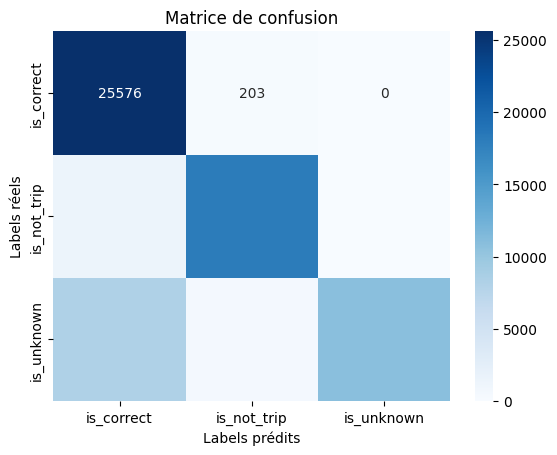

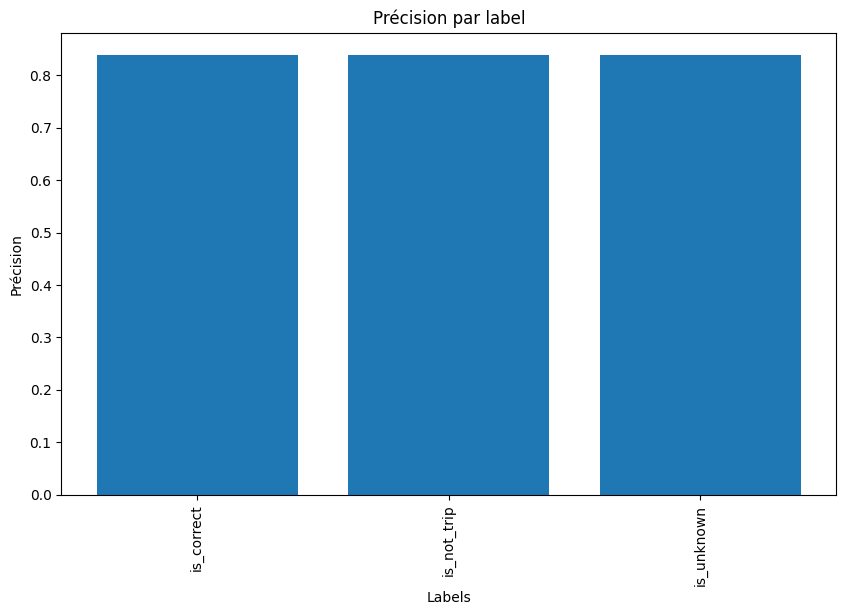

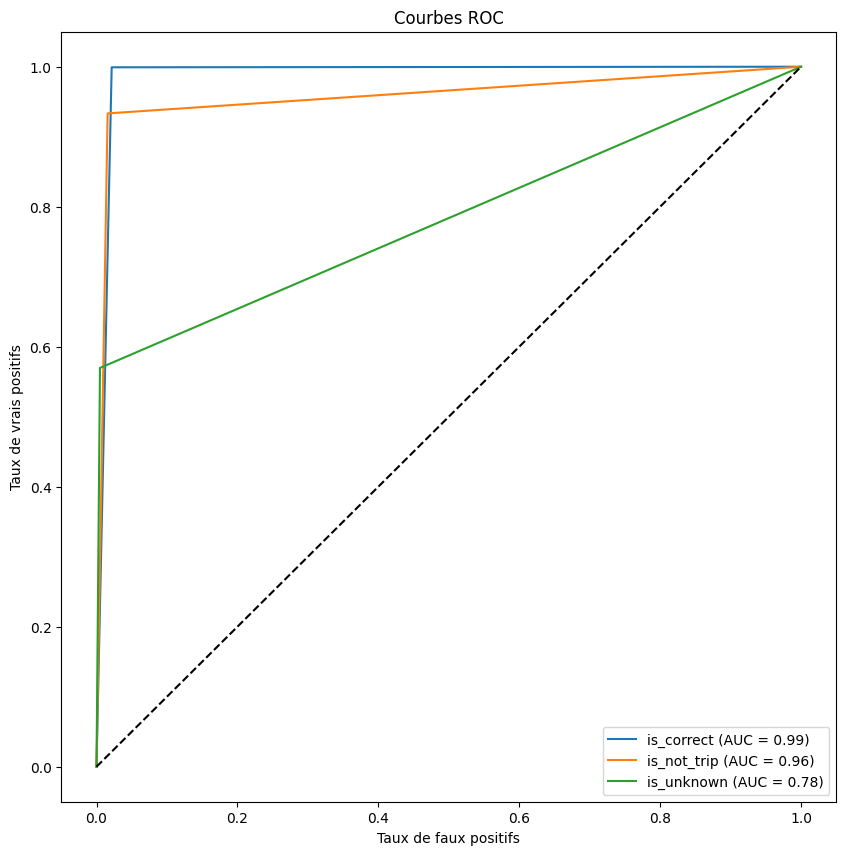

In [8]:
# Fonction pour tracer la précision par label
def plot_precision_by_label(y_test, y_pred, labels):
    accuracies = (y_test.values.argmax(axis=1) == y_pred.argmax(axis=1)).mean(axis=0)
    plt.figure(figsize=(10, 6))
    plt.bar(labels, accuracies)
    plt.title('Précision par label')
    plt.xlabel('Labels')
    plt.ylabel('Précision')
    plt.xticks(rotation=90)
    plt.show()

# Fonction pour tracer les courbes ROC
def plot_roc_curve(y_test, y_pred, labels):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(labels)):
        fpr[i], tpr[i], _ = roc_curve(y_test.values[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 10))
    for i in range(len(labels)):
        plt.plot(fpr[i], tpr[i], label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title('Courbes ROC')
    plt.legend()
    plt.show()
    
# Fonction pour évaluer le modèle
def evaluate_model(pipeline, X_test, y_test, labels):
    y_pred = pipeline.predict(X_test)

    # Rapport de classification
    print("\nRapport de classification :")
    print(classification_report(y_test, y_pred, target_names=labels))

    # Matrice de confusion
    cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
    plt.title('Matrice de confusion')
    plt.xlabel('Labels prédits')
    plt.ylabel('Labels réels')
    plt.show()

    # Précision par label
    plot_precision_by_label(y_test, y_pred, labels)

    # Courbes ROC
    plot_roc_curve(y_test, y_pred, labels)

# Appel de la fonction
evaluate_model(pipeline, X_test, y_test, labels)

In [9]:
# Fonction pour prédire sur des exemples spécifiques
def predict_new_texts(pipeline, texts, id2label):
    predicted_labels = pipeline.predict(texts)
    predicted_proba = pipeline.predict_proba(texts)

    print("\nPrédictions sur de nouveaux textes :")
    for text, p_labels, prob in zip(texts, predicted_labels, predicted_proba):
        print(f"* {text}")
        for i, score in enumerate(prob):
            print(f" - {id2label[i]} => {round(score * 100, 1)}%")
        print()

# Appel de la fonction pour prédire
texts = [
    "Je vais à la boulangerie acheter du pain",
    "I need to go from London to Paris",
    "Je voudrais partir de Paris et aller à Nice",
    "Find me a route from Berlin to Munich",
    "Je souhaite aller à l'aéroport de Roissy",
    "How do I get from the station to the airport?",
    "Peux-tu m'indiquer le chemin du musée au parc?",
    "Take me from Times Square to Central Park",
    "Je suis à Bordeaux, je veux aller à Lyon",
    "Je veux partir de la Gare Saint-Lazare vers Montparnasse",
    "I want to travel from New York to Los Angeles",
    "Comment aller de la plage à la gare ?",
    "I would like to travel from the hotel to the conference center",
    "Aidez-moi à trouver un trajet de Paris à Barcelone",
    "Donne-moi un itinéraire de la Tour Eiffel à Notre-Dame",
    "Trouve un itinéraire pour aller de Marseille à Toulon",
    "J'aimerais partir de la gare de Lyon vers la gare de Montparnasse",
    "I'm looking for directions from the airport to the city center",
    "J'ai besoin d'un itinéraire entre le centre-ville et le musée d'Orsay",
    "Voyagez de Paris à Sannois",
    "frfreferuzbrore0998329839729####"
]
predict_new_texts(pipeline, texts, id2label)


Prédictions sur de nouveaux textes :
* Je vais à la boulangerie acheter du pain
 - is_correct => 99.6%
 - is_not_trip => 0.4%
 - is_unknown => 0.1%

* I need to go from London to Paris
 - is_correct => 0.0%
 - is_not_trip => 71.0%
 - is_unknown => 0.0%

* Je voudrais partir de Paris et aller à Nice
 - is_correct => 98.6%
 - is_not_trip => 2.0%
 - is_unknown => 0.0%

* Find me a route from Berlin to Munich
 - is_correct => 0.0%
 - is_not_trip => 0.6%
 - is_unknown => 0.0%

* Je souhaite aller à l'aéroport de Roissy
 - is_correct => 99.7%
 - is_not_trip => 0.7%
 - is_unknown => 0.0%

* How do I get from the station to the airport?
 - is_correct => 0.0%
 - is_not_trip => 8.0%
 - is_unknown => 0.0%

* Peux-tu m'indiquer le chemin du musée au parc?
 - is_correct => 100.0%
 - is_not_trip => 0.0%
 - is_unknown => 0.0%

* Take me from Times Square to Central Park
 - is_correct => 0.0%
 - is_not_trip => 89.3%
 - is_unknown => 0.0%

* Je suis à Bordeaux, je veux aller à Lyon
 - is_correct => 36